# Biblioteca

In [1]:
import pandas as pd
import sklearn
import numpy as np
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from IPython.display import Image
import pydotplus
import graphviz

In [3]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
sns.set_palette("husl")

# Dados

In [4]:
dados_treino = pd.read_csv("porto_seguro_limpo_treino.csv")
dados_teste = pd.read_csv("porto_seguro_limpo_teste.csv")

In [5]:
X_treino = dados_treino.drop(["id", "target"], 1)
y_treino = dados_treino.loc[:, ["target"]]

X_teste = dados_teste.drop(["id", "target"], 1)
y_teste = dados_teste.loc[:, ["target"]]

# Previsão 

In [6]:
parametros_tunados = [{'max_depth': [5, 10, 20, 30, 50],
                       'min_samples_split': [3, 5, 7, 9, 10]}]

model = GridSearchCV(DecisionTreeClassifier(), parametros_tunados, cv=3, scoring='roc_auc')

## Resultados

In [8]:
result = model.fit(X_treino, y_treino)

auc = roc_auc_score(y_teste, result.predict_proba(X_teste)[:, 1])

print("Parâmetros escolhidos:")
print()
print(model.best_params_)
print()
print("Grid scores:")
print()
media = model.cv_results_['mean_test_score']
desv_pad = model.cv_results_['std_test_score']
for media, desv_pad, params in zip(media, desv_pad, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (media, desv_pad * 2, params))
print()
print("AUC: %.4f" % auc)

Parâmetros escolhidos:

{'max_depth': 5, 'min_samples_split': 7}

Grid scores:

0.598 (+/-0.001) for {'max_depth': 5, 'min_samples_split': 3}
0.598 (+/-0.001) for {'max_depth': 5, 'min_samples_split': 5}
0.598 (+/-0.001) for {'max_depth': 5, 'min_samples_split': 7}
0.598 (+/-0.001) for {'max_depth': 5, 'min_samples_split': 9}
0.598 (+/-0.001) for {'max_depth': 5, 'min_samples_split': 10}
0.591 (+/-0.005) for {'max_depth': 10, 'min_samples_split': 3}
0.591 (+/-0.005) for {'max_depth': 10, 'min_samples_split': 5}
0.592 (+/-0.005) for {'max_depth': 10, 'min_samples_split': 7}
0.592 (+/-0.005) for {'max_depth': 10, 'min_samples_split': 9}
0.592 (+/-0.005) for {'max_depth': 10, 'min_samples_split': 10}
0.491 (+/-0.001) for {'max_depth': 20, 'min_samples_split': 3}
0.493 (+/-0.002) for {'max_depth': 20, 'min_samples_split': 5}
0.494 (+/-0.003) for {'max_depth': 20, 'min_samples_split': 7}
0.496 (+/-0.002) for {'max_depth': 20, 'min_samples_split': 9}
0.497 (+/-0.000) for {'max_depth': 20, 'm

In [9]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=7)
result = clf.fit(X_treino, y_treino)

Text(0.5,0,'Importância relativa')

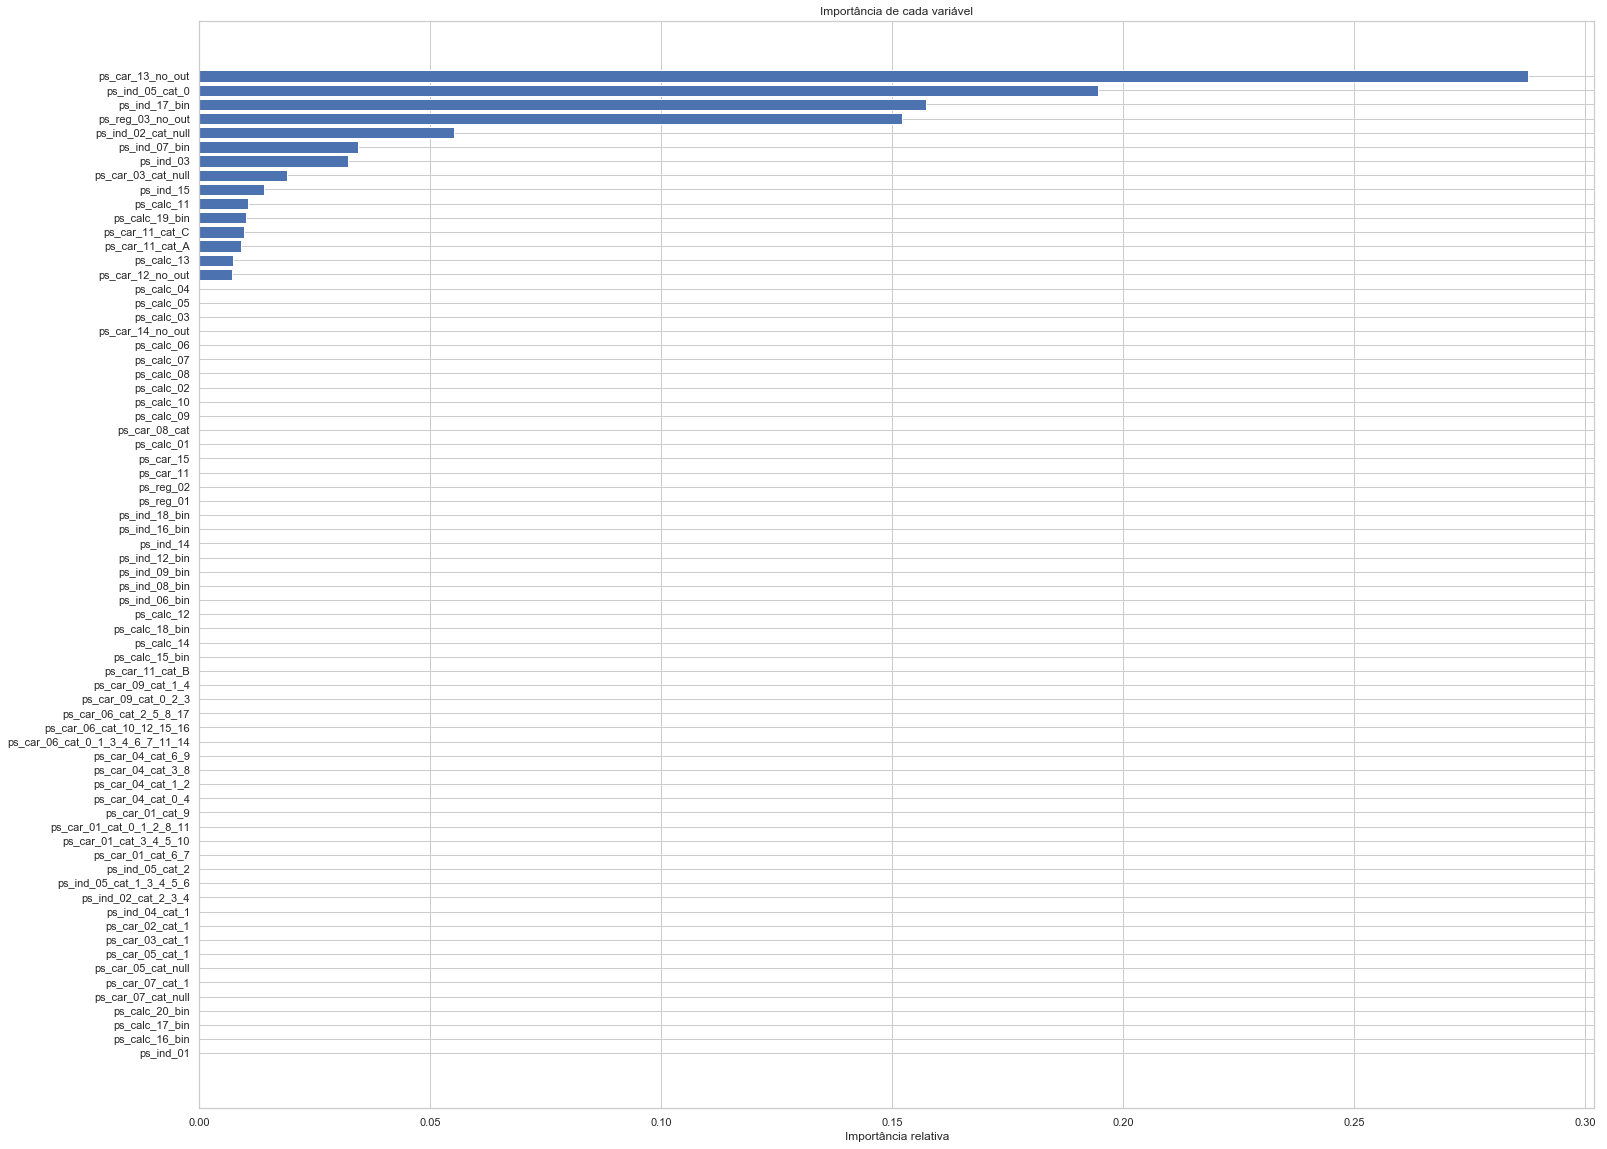

In [10]:
sns.set(rc={'figure.figsize':(25,20)})
sns.set_style("whitegrid")
sns.set_palette("husl")


importances = clf.feature_importances_
indices = np.argsort(importances)
features = X_treino.columns

plt.figure(1)
plt.title('Importância de cada variável')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância relativa')

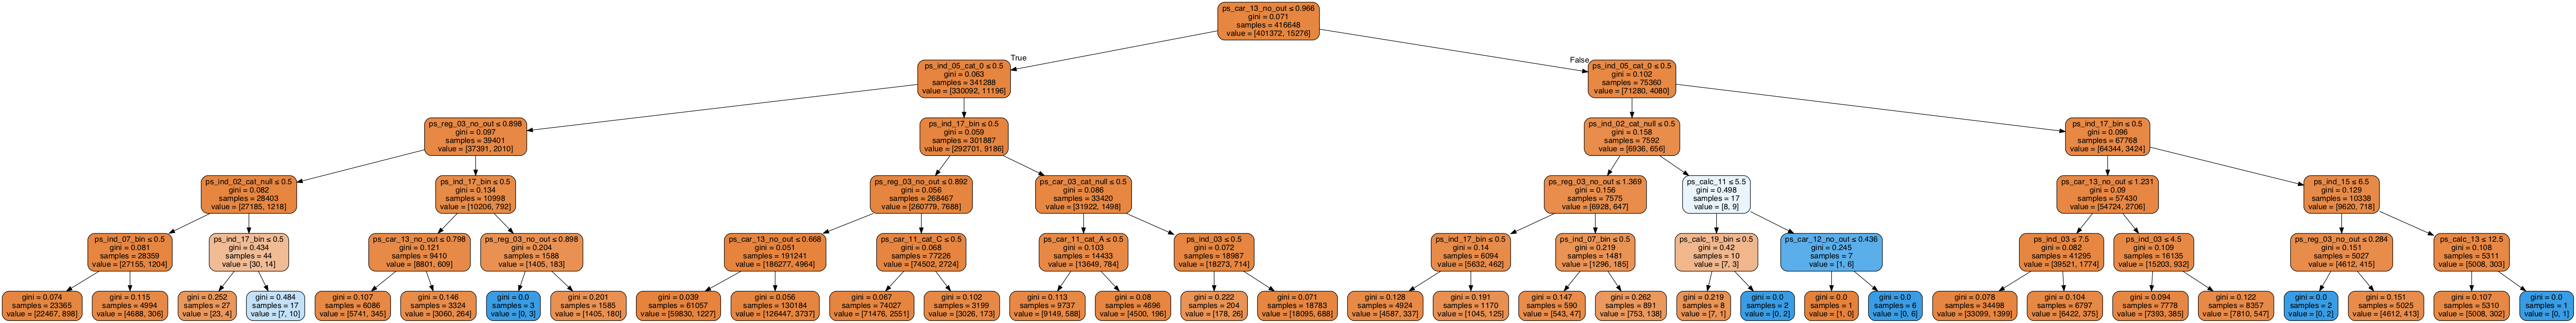

In [11]:
sns.set(rc={'figure.figsize':(50, 40)})
sns.set_style("whitegrid")
sns.set_palette("husl")

dot_data = tree.export_graphviz(clf, 
                                feature_names=X_treino.columns, 
                                filled=True, 
                                special_characters=True,
                                rounded=True,
                                out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data) 

plt = Image(graph.create_png(), width=4000, height=3000)
display(plt)

In [12]:
# # Create PDF
# graph.write_pdf("classification_tree_1.pdf")

# # Create PNG
# graph.write_png("classification_tree_1.png")

# Comentários

Como otimizar mais ainda os parâmetros tunados